# Partie 1: Classification de Documents

In [40]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

## Chargement des Données

In [37]:
# Données d'entrainement
train_data_complete = pd.read_csv("../data/allocine_genres_train.csv", sep=",")
train_data = train_data_complete[["titre", "synopsis", "genre"]]

# Données de test/validation
test_data_complete = pd.read_csv("../data/allocine_genres_test.csv", sep=",")
trest_data = test_data_complete[["titre", "synopsis", "genre"]]

## Analyse des Données

### Analyse Générale

In [26]:
train_data_complete.head(3)

,Unnamed: 0,acteur_1,acteur_2,acteur_3,allocine_id,annee_prod,annee_sortie,box_office_fr,couleur,duree,...,nb_critiques_presse,nb_critiques_spectateurs,nb_notes_spectateurs,note_presse,note_spectateurs,realisateurs,synopsis,titre,type_film,genre
0,4772,Albert Finney,Lauren Bacall,Jacqueline Bisset,1453,1974,1975.0,549055.0,Couleur,128.0,...,NaN,125.0,2045.0,NaN,3.7,Sidney Lumet,"En visite à Istanbul , le célèbre détective be...",Le Crime de l' Orient - Express,NaN,policier
1,335,Henry Fonda,Martin Balsam,John Fiedler,4063,1957,1957.0,NaN,NaN,95.0,...,7.0,771.0,18670.0,5.0,4.6,Sidney Lumet,Un jeune homme d' origine modeste est accusé d...,12 hommes en colère,NaN,drame
2,4860,Alexandra Lamy,Michaël Abiteboul,Julia Piaton,241952,2016,2019.0,NaN,Couleur,90.0,...,NaN,22.0,242.0,NaN,4.2,Nicolas Cuche,"Lorsque Marie-Laure , mère de quatre jeunes en...",Après moi le bonheur,Télefilm,drame


In [27]:
train_data_complete.tail(3)

,Unnamed: 0,acteur_1,acteur_2,acteur_3,allocine_id,annee_prod,annee_sortie,box_office_fr,couleur,duree,...,nb_critiques_presse,nb_critiques_spectateurs,nb_notes_spectateurs,note_presse,note_spectateurs,realisateurs,synopsis,titre,type_film,genre
2872,2350,Kathrine Narducci,Francis Capra,Lillo Brancato,27952,1993,1994.0,NaN,Couleur,121.0,...,NaN,261.0,6874.0,NaN,4.1,Robert De Niro,L' histoire de la communauté italienne des ann...,Il était une fois le Bronx,NaN,drame
2873,2798,Kinuyo Tanaka,Yuko Mochizuki,Teiji Takahashi,89707,1958,NaN,NaN,Couleur,98.0,...,NaN,NaN,18.0,NaN,3.7,Keisuke Kinoshita,"Comme le veut une ancienne tradition , la viei...",La Ballade de Narayama,Long-métrage,drame
2874,3090,Paz Vega,Tristán Ulloa,Elena Anaya,41116,2001,2002.0,82430.0,Couleur,128.0,...,18.0,32.0,287.0,3.3,3.5,Julio Medem,"Après la mort de son petit ami , Lucia , qui e...",Lucia et le sexe,Long-métrage,romance


In [28]:
train_data_complete[["annee_prod", "annee_sortie", "duree", "nb_critiques_presse", "nb_critiques_spectateurs", "nb_notes_spectateurs", "note_presse", "note_spectateurs"]].describe()

,annee_prod,annee_sortie,duree,nb_critiques_presse,nb_critiques_spectateurs,nb_notes_spectateurs,note_presse,note_spectateurs
count,2875.000000,2690.000000,2828.000000,2020.000000,2758.000000,2785.000000,2049.000000,2788.000000
mean,2006.503304,2007.232714,109.269802,18.109406,376.518854,6747.722442,3.251879,3.219978
std,15.952181,15.271904,24.686439,8.484780,537.068509,14202.353830,0.740485,0.725346
min,1922.000000,1924.000000,62.000000,2.000000,2.000000,2.000000,1.000000,0.800000
25%,2002.000000,2003.000000,95.000000,12.000000,67.000000,582.000000,2.800000,2.700000
50%,2012.000000,2013.000000,105.000000,19.000000,187.000000,2109.000000,3.300000,3.350000
75%,2017.000000,2018.000000,119.000000,24.000000,465.750000,6270.000000,3.700000,3.800000
max,2027.000000,2026.000000,566.000000,45.000000,7154.000000,201182.000000,5.000000,4.600000


array([[<AxesSubplot:title={'center':'annee_prod'}>,
        <AxesSubplot:title={'center':'annee_sortie'}>,
        <AxesSubplot:title={'center':'duree'}>],
       [<AxesSubplot:title={'center':'nb_critiques_presse'}>,
        <AxesSubplot:title={'center':'nb_critiques_spectateurs'}>,
        <AxesSubplot:title={'center':'nb_notes_spectateurs'}>],
       [<AxesSubplot:title={'center':'note_presse'}>,
        <AxesSubplot:title={'center':'note_spectateurs'}>,
        <AxesSubplot:>]], dtype=object)

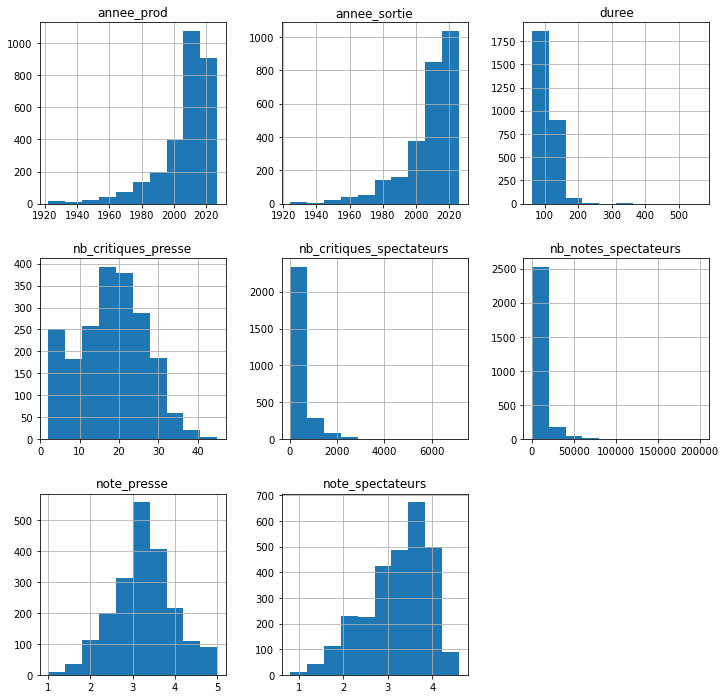

In [29]:
train_data_complete[["annee_prod", "annee_sortie", "duree", "nb_critiques_presse", "nb_critiques_spectateurs", "nb_notes_spectateurs", "note_presse", "note_spectateurs"]].hist(figsize=(12, 12))

In [30]:
train_data_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2875 entries, 0 to 2874
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2875 non-null   int64  
 1   acteur_1                  2875 non-null   object 
 2   acteur_2                  2748 non-null   object 
 3   acteur_3                  2733 non-null   object 
 4   allocine_id               2875 non-null   int64  
 5   annee_prod                2875 non-null   int64  
 6   annee_sortie              2690 non-null   float64
 7   box_office_fr             1783 non-null   float64
 8   couleur                   2708 non-null   object 
 9   duree                     2828 non-null   float64
 10  langues                   2426 non-null   object 
 11  nationalite               2875 non-null   object 
 12  nb_critiques_presse       2020 non-null   float64
 13  nb_critiques_spectateurs  2758 non-null   float64
 14  nb_notes

Il y a un total de 2875 entrées dans les données d'entrainement.

In [31]:
train_data_complete.isna().sum()

Unnamed: 0                     0
acteur_1                       0
acteur_2                     127
acteur_3                     142
allocine_id                    0
annee_prod                     0
annee_sortie                 185
box_office_fr               1092
couleur                      167
duree                         47
langues                      449
nationalite                    0
nb_critiques_presse          855
nb_critiques_spectateurs     117
nb_notes_spectateurs          90
note_presse                  826
note_spectateurs              87
realisateurs                   0
synopsis                       0
titre                          0
type_film                    660
genre                          0
dtype: int64

Aucune valeur de *genre* n'est manquante. Etant donné que l'attribut *genre* sera utilisé comme label, nous pouvons utiliser toutes les entrées dans les données d'entrainement.

### Analyse des Données Utiles

On restreint les données aux attributs que nous utiliserons par la suite.

In [32]:
# train_data = train_data_complete[["titre", "synopsis", "genre"]] (voir section "Chargement des Données")

In [33]:
train_data.head(3)

,titre,synopsis,genre
0,Le Crime de l' Orient - Express,"En visite à Istanbul , le célèbre détective be...",policier
1,12 hommes en colère,Un jeune homme d' origine modeste est accusé d...,drame
2,Après moi le bonheur,"Lorsque Marie-Laure , mère de quatre jeunes en...",drame


In [34]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2875 entries, 0 to 2874
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   titre     2875 non-null   object
 1   synopsis  2875 non-null   object
 2   genre     2875 non-null   object
dtypes: object(3)
memory usage: 67.5+ KB


In [35]:
train_data.describe()

,titre,synopsis,genre
count,2875,2875,2875
unique,2846,2875,9
top,Le Crime de l' Orient - Express,"En visite à Istanbul , le célèbre détective be...",drame
freq,2,1,501


In [36]:
train_data.isna().sum()

titre       0
synopsis    0
genre       0
dtype: int64

## Pré-Traitement des Données

Comme vu précédemment, les paramètres que nous souhaitons utiliser (*titre*, *synopsis*, *genre*) ne comportent pas de valeurs manquantes donc nous n'avons pas besoin d'éliminer d'individus des données d'entrainement.

Nous remarquons aussi que les données sont déjà tokénisées. Tous les tokens sont séparés par des espaces.

Cependant, nous pouvons utiliser un transformer pour obtenir des informations statistiques concernant le *synopsis*.

In [43]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler

# Source : https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer.html
def text_stats(descriptions):
    return [{"length": len(text), "num_sentences": text.count(".")} for text in descriptions]

text_stats_transformer = FunctionTransformer(text_stats)
text_stats_vectorizer = DictVectorizer(sparse=False)

res_dict = text_stats_transformer.transform(train_data.description.head())
res_stats = text_stats_vectorizer.fit_transform(res_dict)
print("Input descriptions")
print(train_data.description.head())
print()
print("Output statistics")
stats = pd.DataFrame(res_stats, columns=text_stats_vectorizer.get_feature_names())
stats

min_max_scaler = MinMaxScaler()
scaled_stats = min_max_scaler.fit_transform(res_stats)

print("Before MinMax scaling")
print(res_stats)
print()
print("After MinMax scaling")
print(scaled_stats)

AttributeError: 'DataFrame' object has no attribute 'description'

## Prediction de Genre

### Création des Jeux d'Entrainement et de Test

Afin de ne pas biaiser le résultat de nos recherches nous n'utiliserons le fichier *allocine_genres_test.csv* uniquement lorsque nous aurons définitivement choisit le classifier. Nous n'utiliserons donc pas *test_data_complete* et *test_data* dans cette section.

Afin de tester et évaluer différents algorithmes nous devons donc créer des jeux de données d'entrainement et de test issus des données d'entrainement (*train_data*). Pour cela nous utilisons la fonction *train_test_split* de la librairie **scikit-learn** en choisissant 20% des données pour créer le jeu de test en prenant soin de mélanger les données (cela perment d'éviter tout biais d'apprentissage: entrainer le classifier unioquement sur les films du XXème siècle).

Nous obtenons donc 4 jeux de données:
- X_train: Titre et synopsis pour entrainement  
- y_train: Genre pour entrainement (label)  
- X_test: Titre et synopsis pour test  
- y_test: Genre pour test (label)  

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data[["titre", "synopsis"]],
                                                    train_data[["genre"]],
                                                    test_size=0.2,
                                                    random_state=12, # Random seed for shuffle
                                                    shuffle=True)

TP1 -> 